In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def attendance_visualisation(df):
    # Calculate YoY % Change
    df["YoY_Change"] = df["Attendance"].pct_change() * 100  # Converts to percentage

    # Set style for better visuals
    sns.set_style("whitegrid")

    # Create figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))

    # --- 1. Attendance Over Time ---
    sns.lineplot(data=df, x="Year", y="Attendance", marker="o", ax=ax[0], color="b")
    ax[0].set_title("Attendance Over Time", fontsize=14)
    ax[0].set_ylabel("Attendance (millions)")
    ax[0].set_xlabel("Year")

    # Annotate key points (Optional)
    for i, row in df.iterrows():
        ax[0].annotate(f"{row['Attendance']:.1f}", (row["Year"], row["Attendance"]), textcoords="offset points", xytext=(0,5), ha="center")

    # --- 2. YoY % Change with Color Coding ---
    # Define colors: Blue for positive, Red for negative
    colors = ["blue" if x >= 0 else "red" for x in df["YoY_Change"]]

    # Create barplot with customized colors
    bars = ax[1].bar(df["Year"], df["YoY_Change"], color=colors)

    # Reference line at 0%
    ax[1].axhline(0, color="black", linewidth=1, linestyle="--")

    ax[1].set_title("YoY % Change in Attendance", fontsize=14)
    ax[1].set_ylabel("Year-over-Year % Change")
    ax[1].set_xlabel("Year")

    # Annotate YoY % change on each bar
    for bar, change in zip(bars, df["YoY_Change"]):
        ax[1].annotate(f"{change:.1f}%", 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    xytext=(0, 5 if change >= 0 else -15),  # Adjust label position
                    textcoords="offset points", 
                    ha="center", fontsize=10, color="black")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()


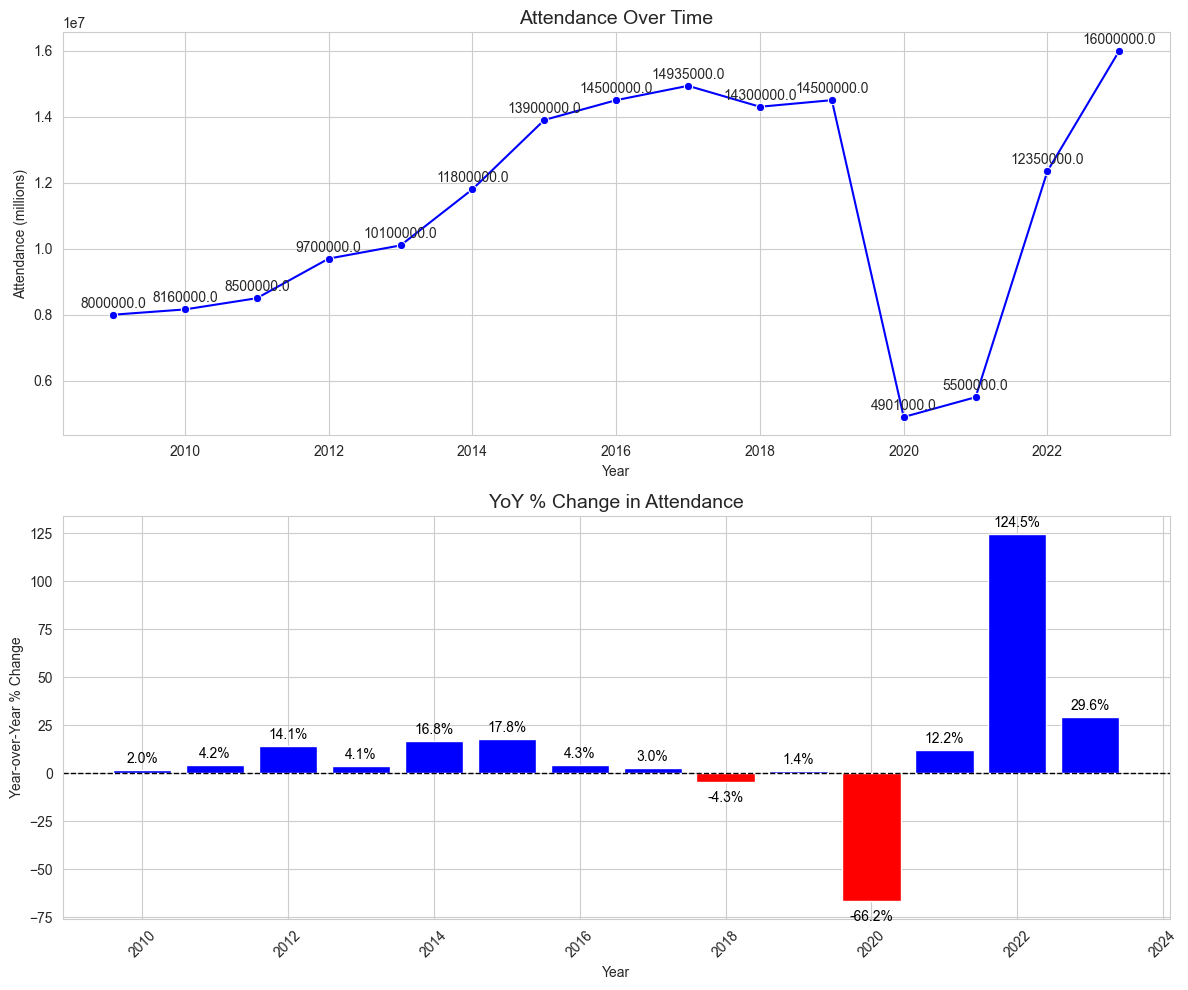

In [3]:
usj_attendance = pd.read_csv("Universal_Studios_Japan_Attendance.csv")
attendance_visualisation(usj_attendance)

In [ ]:
def f(df):
    # Sort by year (if not already sorted)
    df = df.sort_values(by="Year")

    # Calculate YoY % Change
    df["YoY_Change"] = df["Attendance"].pct_change() * 100  # Convert to %

    # Major attraction openings
    attractions = {
        2001: "USJ Opening",
        2010: "Universal Wonderland",
        2014: "Wizarding World of Harry Potter",
        2017: "Minion Park",
        2021: "Super Nintendo World"
    }

    # --- 1. Attendance Over Time with Attraction Markers ---
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6))

    # Line plot for attendance
    sns.lineplot(data=df, x="Year", y="Attendance", marker="o", ax=ax, color="b")

    # Highlight major attraction launches
    for year, name in attractions.items():
        if year in df["Year"].values:
            attendance = df[df["Year"] == year]["Attendance"].values[0]
            ax.axvline(x=year, linestyle="--", color="gray", alpha=0.6)
            ax.text(year, attendance * 1.02, name, rotation=45, fontsize=10, color="black", ha="right")

    ax.set_title("USJ Attendance Over Time with Major Attractions")
    ax.set_ylabel("Attendance (millions)")
    ax.set_xlabel("Year")

    # --- 2. YoY % Change vs. Attraction Launches ---
    fig, ax = plt.subplots(figsize=(12, 6))

    # Scatter plot
    sns.scatterplot(data=df, x="Year", y="YoY_Change", hue=df["YoY_Change"] > 0, palette={True: "blue", False: "red"}, ax=ax)

    # Mark attraction years
    for year, name in attractions.items():
        if year in df["Year"].values:
            yoy_change = df[df["Year"] == year]["YoY_Change"].values[0]
            ax.text(year, yoy_change + 1, name, rotation=45, fontsize=10, color="black", ha="right")

    ax.axhline(0, linestyle="--", color="gray")  # Reference line for 0% change
    ax.set_title("YoY % Change in Attendance vs. Major Attractions")
    ax.set_ylabel("Year-over-Year % Change")
    ax.set_xlabel("Year")

    plt.show()

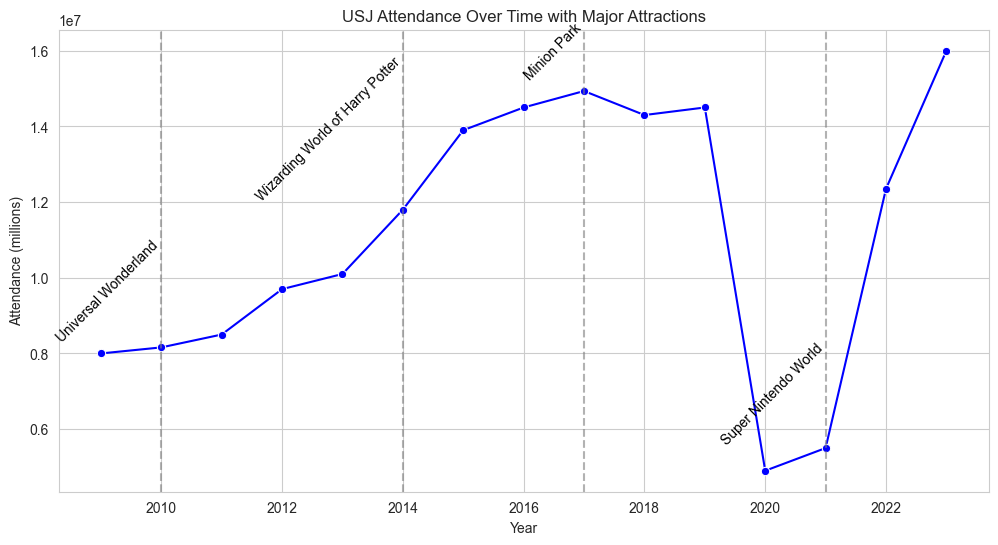

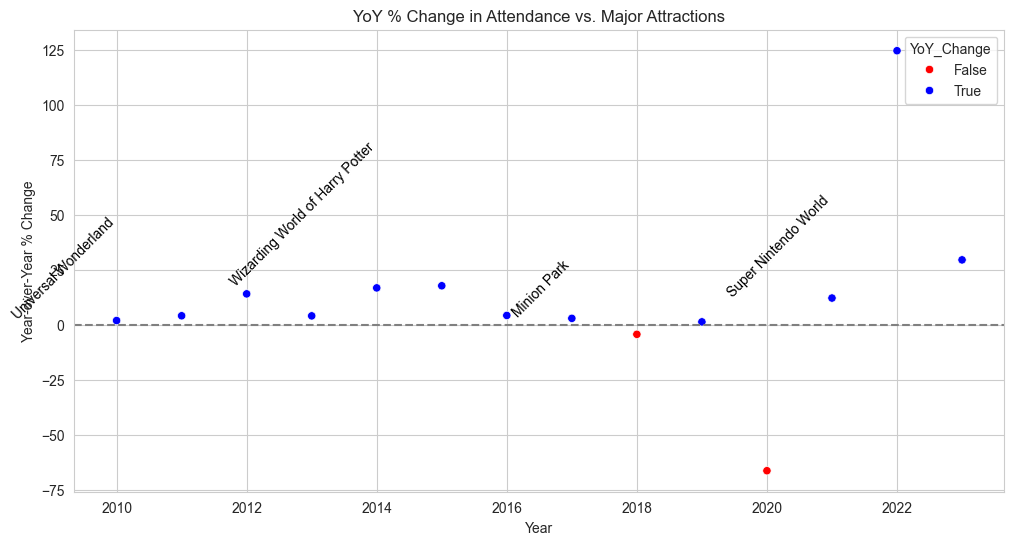

In [5]:
f(usj_attendance)

## Tokyo Disneyland

In [6]:
from extract_tourism_attendance import clean_usj_table

td_tables = pd.read_html("https://en.wikipedia.org/wiki/Tokyo_Disneyland")
td_attendance = clean_usj_table(td_tables[2], 1)

TypeError: clean_usj_table() takes 1 positional argument but 2 were given

In [8]:
td_attendance

,Year,Attendance
0,2006,12900000
1,2007,13906000
2,2008,14293000
3,2009,13646000
4,2010,14452000
5,2011,13996000
6,2012,14847000
7,2013,17214000
8,2014,17300000
9,2015,16600000


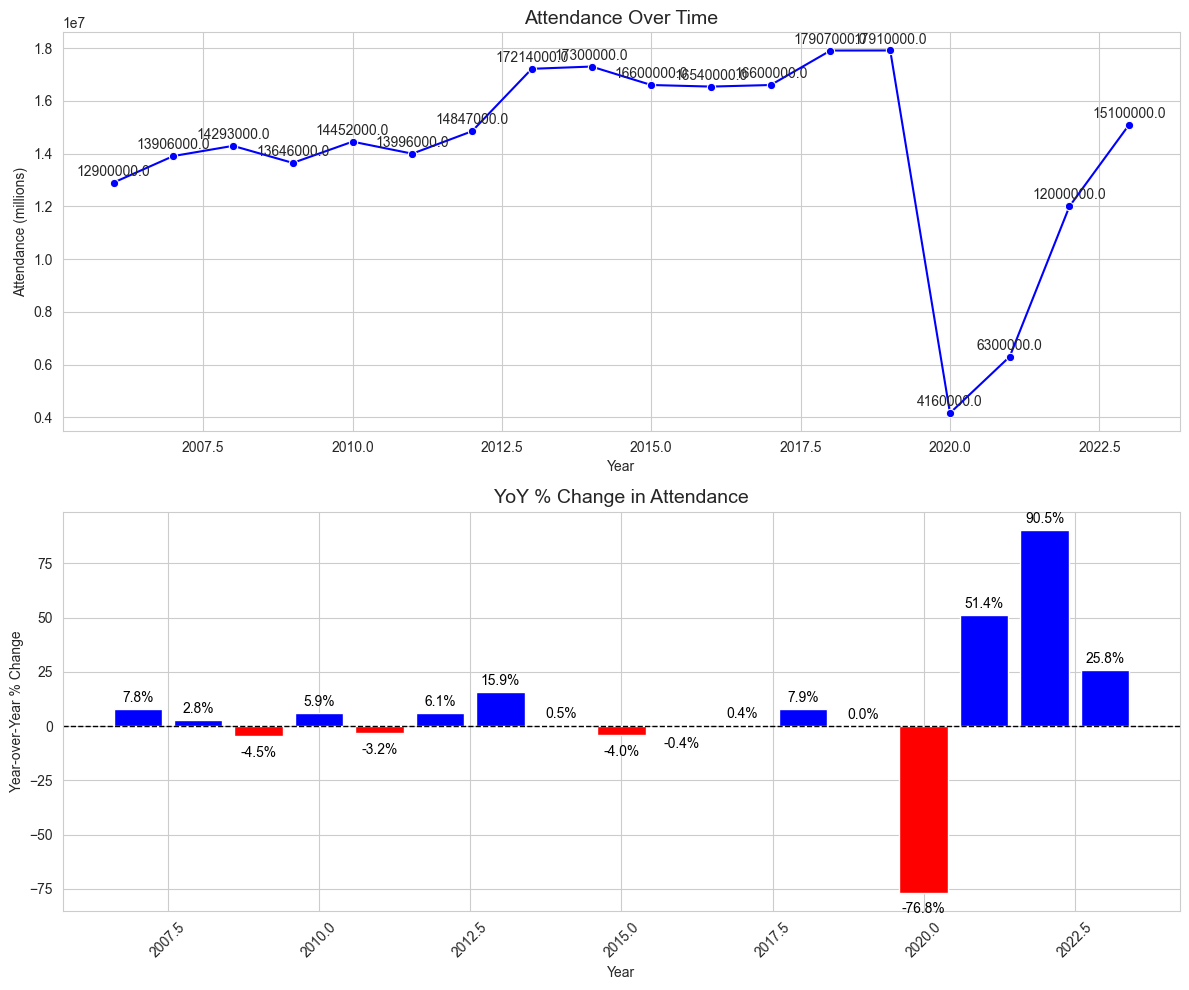

In [9]:
attendance_visualisation(td_attendance)